In [5]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import cv2 
import os 
import glob

In [6]:
import kagglehub
path = kagglehub.dataset_download("jangedoo/utkface-new")# return path de data. 
print(f"Path to dataset files: {path}")

Path to dataset files: C:\Users\HELLO\.cache\kagglehub\datasets\jangedoo\utkface-new\versions\1


In [7]:
dataset=os.listdir(path+"/UTKFace") # ---> DIR 

In [159]:
len(dataset)

23708

In [61]:
labels=[]
images=[]
for img in dataset:
    label=img.split("_")[0]
    image=cv2.imread(path+"/UTKFace/"+img,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(128,128))
    labels.append(int(label))
    images.append(image)

In [161]:
A=len(labels)
B=len(images)
print(f"size of labels :{A}")
print(f"size of images : {B}")

size of labels :23708
size of images : 23708


In [193]:
print(np.unique(labels))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


In [67]:
x=np.array(images)
y=np.array(labels)

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [131]:
from tensorflow.keras.layers import InputLayer

In [145]:
model=Sequential()
model.add(InputLayer(input_shape=(128,128, 3)))
model.add(Conv2D(filters=32,kernel_size=2,activation='relu', padding='Same'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=2,activation='relu', padding='Same'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

In [147]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,786,401 (64.04 MB)

 Trainable params: 16,786,401 (64.04 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=2,
    verbose=0,
    restore_best_weights=True,
)

In [185]:
%%time
history= model.fit(x_train,y_train,
                   validation_split=0.2,
                   epochs=30,
                   callbacks=[early_stopping])

Epoch 1/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 121s 245ms/step - loss: 1545936.7500 - mae: 348.2807 - val_loss: 963.4360 - val_mae: 25.2537
Epoch 2/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 116s 243ms/step - loss: 409.3859 - mae: 15.6177 - val_loss: 846.6231 - val_mae: 23.5655
Epoch 3/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 116s 244ms/step - loss: 386.6004 - mae: 15.2019 - val_loss: 834.4580 - val_mae: 23.4688
Epoch 4/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 117s 245ms/step - loss: 363.2787 - mae: 14.7307 - val_loss: 921.9874 - val_mae: 24.7541
Epoch 5/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 115s 242ms/step - loss: 357.5601 - mae: 14.4028 - val_loss: 810.2824 - val_mae: 23.0365
Epoch 6/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 115s 241ms/step - loss: 339.5099 - mae: 13.9913 - val_loss: 825.1439 - val_mae: 23.5310
Epoch 7/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 116s 244ms/step - loss: 318.0276 - mae: 13.6055 - val_loss: 985.4064 - val_mae: 26.1452
CPU times: total: 1h 24min 26s
Wall time: 13min 35s


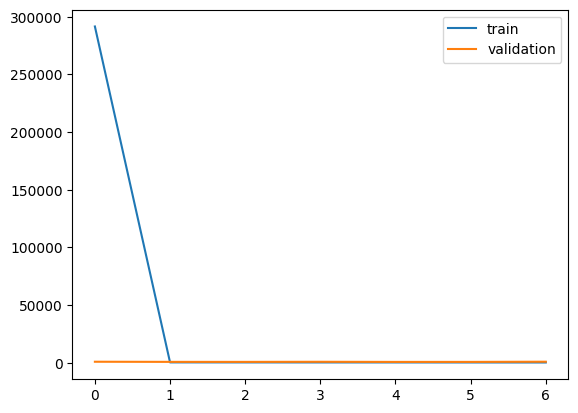

In [203]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

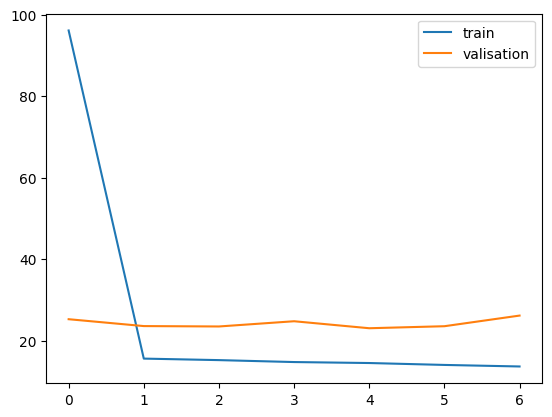

In [205]:
plt.plot(history.history['mae'],label='train')
plt.plot(history.history['val_mae'],label='valisation')
plt.legend()

In [209]:
test_score=model.evaluate(x_test,y_test)
test_score

149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 769.4587 - mae: 22.6376


[790.0687866210938, 23.003978729248047]

In [215]:
categories=[]
for i in labels :
    if i <12 :
        categories.append("kid")
    elif i>12 and i<19:
        categories.append("Teenager")
    elif i>19 and i<50 :
        categories.append("Adult")
    else :
        categories.append("old")
    label_encoder=LabelEncoder()
    labels_encoded=label_encoder.fit_transform(categories)

In [219]:
Label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label mapping:", Label_mapping)

Label mapping: {'Adult': 0, 'Teenager': 1, 'kid': 2, 'old': 3}


In [221]:
x_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(x, labels_encoded, test_size=0.2, random_state=42, shuffle = True)


In [229]:
model2=Sequential()
model2.add(InputLayer(input_shape=(128,128, 3)))
model2.add(Conv2D(filters=32,kernel_size=2,activation='relu', padding='Same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.25))
model2.add(Conv2D(filters=64,kernel_size=2,activation='relu', padding='Same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(4, activation='softmax'))

In [231]:
model2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,787,172 (64.04 MB)

 Trainable params: 16,787,172 (64.04 MB)

 Non-trainable params: 0 (0.00 B)

In [233]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=2,
    verbose=0,
    restore_best_weights=True,
)

In [237]:
%%time
history_cat = model2.fit(x_cat_train,y_cat_train,
                   validation_split=0.2,
                   epochs=30,
                   callbacks=[early_stopping])

Epoch 1/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 116s 241ms/step - accuracy: 0.5330 - loss: 173.3861 - val_accuracy: 0.6313 - val_loss: 1.1150
Epoch 2/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 127s 268ms/step - accuracy: 0.6540 - loss: 0.9288 - val_accuracy: 0.6613 - val_loss: 0.9598
Epoch 3/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 123s 258ms/step - accuracy: 0.6965 - loss: 0.8160 - val_accuracy: 0.6937 - val_loss: 0.8459
Epoch 4/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 110s 231ms/step - accuracy: 0.7139 - loss: 0.7631 - val_accuracy: 0.7143 - val_loss: 0.7726
Epoch 5/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 105s 221ms/step - accuracy: 0.7351 - loss: 0.7068 - val_accuracy: 0.7143 - val_loss: 0.7538
Epoch 6/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 106s 224ms/step - accuracy: 0.7346 - loss: 0.6927 - val_accuracy: 0.7148 - val_loss: 0.7964
Epoch 7/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 104s 220ms/step - accuracy: 0.7573 - loss: 0.6571 - val_accuracy: 0.7536 - val_loss: 0.7035
Epoch 8/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 104s 219ms/step - accuracy: 0.7541

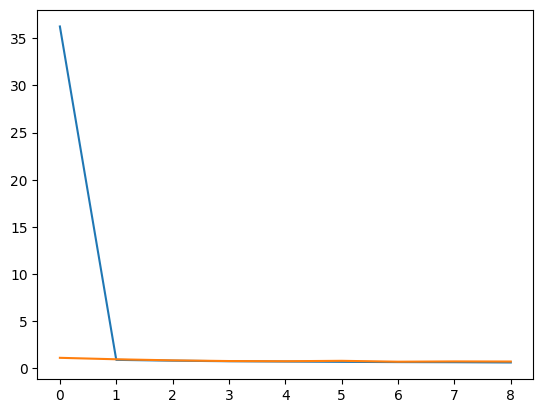

In [238]:
plt.plot(history_cat.history['loss'],label='train')
plt.plot(history_cat.history['val_loss'],label='validation')
plt.show()

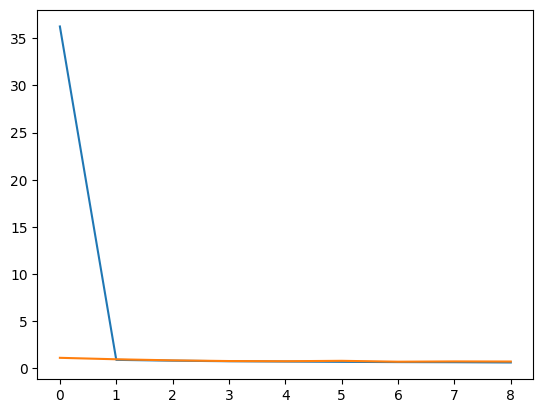

In [239]:
plt.plot(history_cat.history['loss'],label='train')
plt.plot(history_cat.history['val_loss'],label='validation')
plt.show()


In [289]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img_path = 'ma_photo.jpg'  # Replace with your actual image path
img = load_img(img_path, target_size=(128, 128))  # Load image with specified size
predicted_age = model.predict(img_array)
print(f"Predicted age: {predicted_age[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted age: 0.9063113927841187
